# Classifying movie review

### Visão Geral
A classificação binária é um dos problemas mais comuns em machine learning. Neste exemplo, o objetivo é classificar resenhas de filmes como **positivas** ou **negativas**, com base no conteúdo textual.

### O Conjunto de Dados IMDB
- Contém **50.000 resenhas polarizadas** (positivas ou negativas).
- Dividido em **25.000 para treino** e **25.000 para teste**.
- Cada conjunto possui **50% de resenhas positivas e 50% negativas**.
- Já vem pré-processado: as palavras das resenhas foram convertidas em **índices inteiros**, representando um vocabulário.

### Carregamento do Dataset
- Usa-se apenas as **10.000 palavras mais frequentes** no conjunto de treino.
- Isso reduz a dimensionalidade e remove palavras raras que não contribuem para a classificação.

### Dados de Entrada e Rótulos
- Os dados de treino e teste são **listas de sequências de inteiros**.
- Os rótulos (`labels`) são **0 para negativo** e **1 para positivo**.

### Preparação dos Dados
Redes neurais esperam **tensores com formatos padronizados**. Por isso, é necessário transformar as sequências de inteiros em vetores fixos. Duas abordagens são possíveis:

1. **Padding**: padronizar o comprimento das sequências com zeros e utilizar uma camada de embedding.
2. **Codificação Multi-Hot**: transformar cada sequência em um **vetor binário** com 0s e 1s, indicando a presença de palavras no vocabulário.

Nesse exemplo, a segunda abordagem é usada manualmente para melhor compreensão.

### Vetorização
- As sequências são convertidas em **vetores binários de 10.000 posições**.
- Cada vetor representa uma resenha, com `1` nos índices correspondentes às palavras presentes na resenha.

### Vetorização dos Rótulos
- Os rótulos também são convertidos para arrays NumPy do tipo `float32`, para compatibilidade com modelos de redes neurais.

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0], train_labels[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

In [4]:
# representação bag of words
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# transforma em array numpy do tipo float
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Modelo

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Unidades e Espaço de Representação
Quanto mais unidades nas camadas, **maior a capacidade de aprendizado**, mas também:
  - Aumenta o custo computacional.
  - Pode causar **overfitting** (modelo aprende padrões irrelevantes).

#### Funções de Ativação
- Camadas intermediárias usam **ReLU** (zera valores negativos).
- A camada final usa **Sigmoid**, pois:
  - Retorna um valor entre **0 e 1**, interpretado como **probabilidade** da classe ser “1” (ex.: resenha positiva).

#### Por que usar funções de ativação?
- Sem ativação (ReLU), a camada só aprenderia **transformações lineares**.
- Com ReLU (ou outra não linearidade), o modelo acessa um **espaço de hipóteses mais rico** e pode se beneficiar de várias camadas.

#### Função de Perda
- Melhor opção: **binary_crossentropy** (mede a diferença entre distribuições de probabilidade).
- Outra opção possível: **mean_squared_error**, mas menos recomendada para classificação binária.

#### Otimizador
- Usado: **rmsprop**
  - É uma escolha padrão eficaz para muitos problemas.
  - Modelo também monitora a **acurácia** durante o treino.

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## Validação

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.6902 - loss: 0.6241 - val_accuracy: 0.8473 - val_loss: 0.4462
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8807 - loss: 0.3923 - val_accuracy: 0.8786 - val_loss: 0.3391
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9142 - loss: 0.2799 - val_accuracy: 0.8763 - val_loss: 0.3084
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9241 - loss: 0.2286 - val_accuracy: 0.8863 - val_loss: 0.2847
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9420 - loss: 0.1837 - val_accuracy: 0.8827 - val_loss: 0.2916
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9468 - loss: 0.1603 - val_accuracy: 0.8863 - val_loss: 0.2771
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9592 - loss: 0.1338 - val_accuracy: 0.8768 - val_loss: 0.3143
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9622 - loss: 0.1222 - val_accuracy: 0.8854 - 

In [11]:
dicionario = history.history
dicionario.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

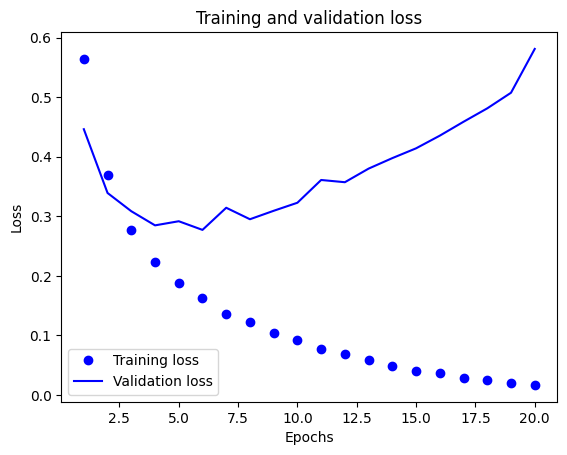

In [12]:
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

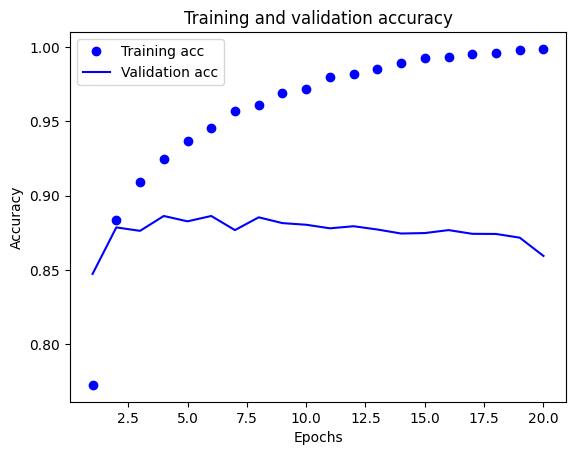

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9445 - loss: 0.2259
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9612 - loss: 0.1253
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9722 - loss: 0.0964
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9781 - loss: 0.0806
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8604 - loss: 0.4607


In [16]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8604 - loss: 0.4607


In [15]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01584579],
       [0.9999879 ],
       [0.05103836],
       ...,
       [0.02238364],
       [0.01183638],
       [0.9161667 ]], dtype=float32)